# **Diabetes Prediction** Model


---


---



### **Description of the Dataset**

The data were collected from the Iraqi society and acquired from the laboratory of Medical City Hospital (the Specializes Center for Endocrinology and Diabetes-Al-Kindy Teaching Hospital).

Patients' files were taken and data extracted from them and entered in to the database to construct the diabetes dataset. The data consist of medical information, laboratory analysis.

The data consist of medical information, laboratory analysis, etc. The data that have been entered initially into the system are:

* ***ID***

* Number of Patient as ***No_Pation***

* Gender as ***Gender***

* Age as ***AGE***

* Urea as ***Urea***

* Creatinine ratio as ***Cr***

* The average blood glucose level over the past three months as ***HbA1c***,

* Fasting lipid profile including total Cholesterol as ***Chol***, Triglycerides as ***TG***, ***HDL*** Cholesterol, ***LDL***, ***VLDL***

* Body Mass Index as ***BMI***

* Class (the patient's diabetes disease class may be Diabetic, Non-Diabetic, or PreDiabetic) as ***CLASS***

https://data.mendeley.com/datasets/wj9rwkp9c2/1


---

## **1 - Loading Dataset**



---



In [1]:
# Importing important and the most used libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Uploading and reading data From the Google drive

data_id = "1B8g8zOF_LRf-O117vcBLDXzIOKwULWOA"
dwn_url='https://drive.google.com/uc?id='
data = pd.read_csv(dwn_url+data_id)
data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y




---

## **2 - Feature Engineering and Data Cleaning**

---





In [3]:
# Taking a look at the data summary statistics

data.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [4]:
#  Checking how the overal dataset looks like (Any null values? data types? dataframe shape?)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [5]:
# Particularly interested in how many categories exist in 'CLASS' column and how much patients do exist in each category.
# p.n: 'CLASS' column is the "target variable" that classifies Non-diabiteic (N), Pre-diabetic (P) and Diabetic patients (Y) in 3 Classes.

data["CLASS"].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [6]:
#  There are redundant categories perhaps due to typing error, let's check!

data[(data["CLASS"] == "Y ") | (data["CLASS"] == "N ")]

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
102,435,34241,M,38,6.1,83,5.4,4.5,1.7,0.9,2.8,0.8,24.6,N
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y
999,248,24054,M,54,5.0,67,6.9,3.8,1.7,1.1,3.0,0.7,33.0,Y


In [7]:
# Removing empty spaces and therfore categorizing 'CLASS' column into 3 categories (N, P, Y)

data["CLASS"] = data["CLASS"].str.strip()

In [8]:
# Checking if now the 'CLASS' column is clean 

data["CLASS"].value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

In [9]:
# For easier readability of the code, let's change 'N': 'Non-Diabetic', 'P': 'Pre-Diabetic', 'Y': 'Diabetic'

data.CLASS = data.CLASS.map({'N': 'Non-Diabetic', 'P': 'Pre-Diabetic', 'Y': 'Diabetic'})

In [10]:
data.CLASS.value_counts()

CLASS
Diabetic        844
Non-Diabetic    103
Pre-Diabetic     53
Name: count, dtype: int64

In [11]:
# How does the 'Gender' column looks like? As an Object type is there any type issues in this column?

data["Gender"].value_counts()

Gender
M    565
F    434
f      1
Name: count, dtype: int64

In [12]:
# Chainging 'Gender' column into uppercase 

data["Gender"] = data["Gender"].str.upper()

In [13]:
# Checking if now the 'Gender' column is clean 

data["Gender"].value_counts()

Gender
M    565
F    435
Name: count, dtype: int64

In [14]:
# For easier readability of the code, let's change 'F' into 'Female' and 'M' into 'Male'

data.Gender = data.Gender.map({'F': 'Female', 'M': 'Male'})

In [15]:
data.Gender.value_counts()

Gender
Male      565
Female    435
Name: count, dtype: int64

In [16]:
# Adding a numerical column as 'CLASS_Category' from 'CLASS' column for feasibility of further Analysis and Machine Learning (ML)

data['CLASS_Category'] = data['CLASS'].map({'Non-Diabetic': 0, 'Pre-Diabetic': 1, 'Diabetic': 2})
data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,CLASS_Category
0,502,17975,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0
1,735,34221,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,Non-Diabetic,0
2,420,47975,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0
3,680,87656,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0
4,504,34223,Male,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,Non-Diabetic,0


In [17]:
# Changing the data type of 'CLASS' and 'Gender'as the only objects into 'category' 

data[["CLASS", "Gender"]] = data[["CLASS", "Gender"]].astype("category")

In [18]:
# Checking data type of every column

data.dtypes

ID                   int64
No_Pation            int64
Gender            category
AGE                  int64
Urea               float64
Cr                   int64
HbA1c              float64
Chol               float64
TG                 float64
HDL                float64
LDL                float64
VLDL               float64
BMI                float64
CLASS             category
CLASS_Category       int64
dtype: object

In [19]:
# Adding a numerical column as 'Gender_Category' from 'Gender' column for feasibility of further Analysis and Machine Learning (ML)

data["Gender_Category"] = data["Gender"].cat.codes

In [20]:
# Take a look at the dataset with new changes and added columns

data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,CLASS_Category,Gender_Category
0,502,17975,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
1,735,34221,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,Non-Diabetic,0,1
2,420,47975,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
3,680,87656,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
4,504,34223,Male,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,Non-Diabetic,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,Male,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Diabetic,2,1
996,671,876534,Male,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Diabetic,2,1
997,669,87654,Male,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Diabetic,2,1
998,99,24004,Male,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Diabetic,2,1


In [21]:
# Double check if there is any null value in the dataset

data.isna().sum()

ID                 0
No_Pation          0
Gender             0
AGE                0
Urea               0
Cr                 0
HbA1c              0
Chol               0
TG                 0
HDL                0
LDL                0
VLDL               0
BMI                0
CLASS              0
CLASS_Category     0
Gender_Category    0
dtype: int64

In [22]:
# Droping unnecessary columns that interfer with statistics, exploratory data analysis(EDA) and ML

data = data.drop(["ID", "No_Pation"], axis = 1)

In [23]:
data

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,CLASS_Category,Gender_Category
0,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
1,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,Non-Diabetic,0,1
2,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
3,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
4,Male,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,Non-Diabetic,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Male,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Diabetic,2,1
996,Male,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Diabetic,2,1
997,Male,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Diabetic,2,1
998,Male,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Diabetic,2,1


In [24]:
# Printing the categories codes in 'CLASS' column and their original naming 

print({'Non-Diabetic': 0, 'Pre-Diabetic': 1, 'Diabetic': 2})

{'Non-Diabetic': 0, 'Pre-Diabetic': 1, 'Diabetic': 2}


In [25]:
# Mapping from the categories codes in 'Gender' column and their original naming 

dict(enumerate(data['Gender'].cat.categories))

{0: 'Female', 1: 'Male'}


---

## **3 - Exploratory Data Analysis (EDA)**

---



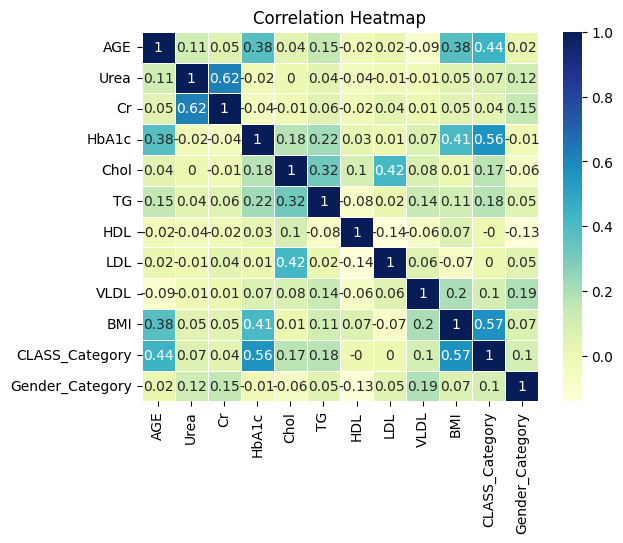

In [26]:
# Pearson Correlation showing on a heatmap
heatmap_data = data.corr(numeric_only = True).round(2)

# Create a heatmap using seaborn
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", linewidths=0.5)

# Set plot title
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

In [72]:
!pip install dash

In [ ]:
import dash
from dash import dcc
from dash import html
import plotly.express as px

# DataFrame = data
available_columns = data.columns.tolist()

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.Label('X Variable'),
    dcc.Dropdown(
        id='x-dropdown',
        options=[{'label': col, 'value': col} for col in available_columns],
        value='X'
    ),
    html.Label('Y Variable'),
    dcc.Dropdown(
        id='y-dropdown',
        options=[{'label': col, 'value': col} for col in available_columns],
        value='Y'
    ),
    html.H4('Interactive scatter plot with Diabetes dataset'),
    dcc.Graph(
        id='scatter-plot'
    ),
    html.P("Filter by Gender:"),
    dcc.Dropdown(
        id='gender-dropdown',
        options=[{'label': col, 'value': col} for col in ['ALL' ,"Female", "Male"]],
        value='Gender'
    )
])

# Define the callback to update the scatter plot
@app.callback(
    dash.dependencies.Output('scatter-plot', 'figure'),
    [
        dash.dependencies.Input('x-dropdown', 'value'),
        dash.dependencies.Input('y-dropdown', 'value'),
        dash.dependencies.Input('gender-dropdown', 'value')
    ]
)
def update_scatter_plot(x_var, y_var, gender):
    if gender == 'Female' or gender == 'Male':
        filtered_data = data[data['Gender'] == gender]
    else:
        filtered_data = data.copy()

    fig = px.scatter(filtered_data, x=x_var, y=y_var, color='CLASS', symbol='CLASS')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
# DataFrame = data
available_columns = data.columns.tolist()

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.Label('Column'),
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in available_columns],
        value='Column1'
    ),
    dcc.Graph(
        id='histogram-plot'
    )
])

# Define the callback to update the histogram plot
@app.callback(
    dash.dependencies.Output('histogram-plot', 'figure'),
    dash.dependencies.Input('column-dropdown', 'value')
)
def update_histogram_plot(column):
    fig = px.histogram(data, x=column, color='CLASS', pattern_shape='Gender', histnorm = "percent")

    # Overlay both histograms
    fig.update_layout(barmode='overlay')

    # Reduce opacity to see both histograms
    fig.update_traces(opacity=0.75)

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=False)



<IPython.core.display.Javascript object>

In [ ]:
import dash
from dash import dcc
from dash import html
import seaborn as sns
import plotly.express as px
from dash.dependencies import Input, Output

# DataFrame = data

available_columns = data.columns.tolist()

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div(
    style={'background-color': '#f2f2f2', 'padding': '20px'},
    children=[
        html.H1('Catplot Dashboard', style={'text-align': 'center', 'margin-bottom': '30px'}),
        html.Div(
            style={'background-color': '#ffffff', 'padding': '20px', 'border-radius': '10px'},
            children=[
                html.Label('Column', style={'font-weight': 'bold'}),
                dcc.Dropdown(
                    id='column-dropdown',
                    options=[{'label': col, 'value': col} for col in available_columns],
                    value=available_columns[0],  # Set the default value to the first column
                    style={'width': '250px', 'margin-bottom': '10px'}
                ),
                dcc.Graph(
                    id='cat-plot',
                    config={'displayModeBar': False}  # Hide the plotly mode bar
                )
            ]
        )
    ]
)


# Define the callback to update the cat plot
@app.callback(
    Output('cat-plot', 'figure'),
    Input('column-dropdown', 'value')
)
def update_cat_plot(column):
    # Create the catplot using seaborn
    fig = px.violin(data, x=column, box=True)

    # Set the labels and title
    fig.update_layout(
        xaxis_title=column,
        yaxis_title='Frequency',
        title=f'Catplot Showing Distribution of {column}'
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=False)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

BMI_column = data['BMI']
BMI_statistics = BMI_column.describe()
print(BMI_statistics)

# Create a categorical plot using catplot with violin plot style
g = sns.catplot(data=data, x='BMI', kind='violin', palette='muted', height=4, aspect=2)

# Set the labels and title
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')

# Add a legend for the BMI ranges
plt.axvspan(0, 18.5, color='blue', alpha=0.25, label='Underweight')
plt.axvspan(18.5, 24.9, color='green', alpha=0.25, label='Healthy Weight')
plt.axvspan(25.0, 29.9, color='orange', alpha=0.25, label='Overweight')
plt.axvspan(30.0, 55, color='red', alpha=0.25, label='Obese')
plt.legend()

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

HbA1c_column = data['HbA1c']
HbA1c_statistics = HbA1c_column.describe()
print(HbA1c_statistics)

# Create a categorical plot using catplot with violin plot style
g = sns.catplot(data=data, x='HbA1c', kind='violin', palette='muted', height=4, aspect=2)

# Set the labels and title
plt.xlabel('HbA1c')
plt.ylabel('Frequency')
plt.title('Distribution of HbA1c')

# Add a legend for the BMI ranges
plt.axvspan(0, 5.6, color='green', alpha=0.25, label='Normal Range')
plt.axvspan(5.6, 6.4, color='orange', alpha=0.25, label='Prediabetes')
plt.axvspan(6.4, 18, color='red', alpha=0.25, label='Diabetes')
plt.legend()

plt.show()




---

## **4 - Machine Learning (ML)**

---



italicised text

---


###***4.1 - Logistic Regression - Classification***
---


### Split the dataset into 80/20 training/testing split with a random state of 50

In [ ]:
data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,CLASS_Category,Gender_Category
0,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
1,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,Non-Diabetic,0,1
2,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
3,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
4,Male,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,Non-Diabetic,0,1


In [ ]:
# X and y sets

X = data.drop(['CLASS_Category', 'CLASS', 'Gender'], axis= 1)
y = data['CLASS_Category']

print(X.head())
print()
print(y.head())

   AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  Gender_Category
0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0                0
1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0                1
2   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0                0
3   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0                0
4   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0                1

0    0
1    0
2    0
3    0
4    0
Name: CLASS_Category, dtype: int64


In [ ]:
# training/testing split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 50)

In [ ]:
print(data.shape)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)


(1000, 14)
(800, 11)
(200, 11)
(800,)
(200,)


In [ ]:
# Train the model and then predict on the test set

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2600)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=2600)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
# What is the accuracy of your predictions?

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy score is: ", accuracy_score(y_test, y_pred))
print("Precision score is: ", precision_score(y_test, y_pred, average='macro'))
print("Recall score is: ", recall_score(y_test, y_pred, average='macro'))
print("f1 score is: ", f1_score(y_test, y_pred, average='macro'))

Accuracy score is:  0.935
Precision score is:  0.6750793650793652
Recall score is:  0.6405628581058308
f1 score is:  0.6563376318419546


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


---

### ***4.2 - Normalization of the data - MinMaxScaler***

---


In [ ]:
data

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,CLASS_Category,Gender_Category
0,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
1,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,Non-Diabetic,0,1
2,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
3,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
4,Male,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,Non-Diabetic,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Male,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Diabetic,2,1
996,Male,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Diabetic,2,1
997,Male,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Diabetic,2,1
998,Male,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Diabetic,2,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
X_norm = pd.DataFrame(scaler.fit_transform(X[['Urea',	'Cr',	'HbA1c',	'Chol',	'TG',	'HDL',	'LDL',	'VLDL']]), columns=X[['Urea',	'Cr',	'HbA1c',	'Chol',	'TG',	'HDL',	'LDL',	'VLDL']].columns)

X_norm = pd.concat([X_norm, X[['AGE', 'BMI', 'Gender_Category']]], axis=1)
X_norm

,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,AGE,BMI,Gender_Category
0,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,50,24.0,0
1,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,26,23.0,1
2,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,50,24.0,0
3,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,50,24.0,0
4,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,33,21.0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,0.273438,0.114610,0.403974,0.728155,0.103704,0.103093,0.156250,0.014327,71,30.0,1
996,0.065104,0.068010,0.754967,0.398058,0.140741,0.051546,0.218750,0.438395,31,37.2,1
997,0.171875,0.094458,0.384106,0.398058,0.059259,0.103093,0.218750,0.229226,30,27.4,1
998,0.138021,0.066751,0.384106,0.514563,0.125926,0.144330,0.270833,0.398281,38,40.5,1


In [ ]:
# training/testing split

from sklearn.model_selection import train_test_split
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y, test_size=0.2, random_state=30)

# Train the model and then predict on the test set
from sklearn.linear_model import LogisticRegression

lr_norm = LogisticRegression(max_iter = 500)
lr_norm.fit(X_norm_train, y_norm_train)

LogisticRegression(max_iter=500)

In [ ]:
y_norm_pred = lr_norm.predict(X_norm_test)

In [ ]:
# What is the accuracy of your predictions?

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy score is: ", accuracy_score(y_norm_test, y_norm_pred))
print("Precision score is: ", precision_score(y_norm_test, y_norm_pred, average='macro'))
print("Recall score is: ", recall_score(y_norm_test, y_norm_pred, average='macro'))
print("f1 score is: ", f1_score(y_norm_test, y_norm_pred, average='macro'))

Accuracy score is:  0.905
Precision score is:  0.6650645994832041
Recall score is:  0.6385742462665539
f1 score is:  0.6288671590214368


---


###***4.3 - XGboost***
---


In [ ]:
from xgboost import XGBClassifier

# read data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X_XG = data.drop(['CLASS_Category', 'CLASS', 'Gender'], axis= 1)
y_XG = data['CLASS_Category']

In [ ]:
X_XG

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender_Category
0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,1
2,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,1
996,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,1
997,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,1
998,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,1


In [ ]:
# Training the model

X_XG_train, X_XG_test, y_XG_train, y_XG_test = train_test_split(X_XG, y_XG, test_size=.2, random_state = 40)
# create model instance
bst = XGBClassifier(n_estimators=3, max_depth=3, learning_rate=1, objective='multiple:logistic')
# fit model
bst.fit(X_XG_train, y_XG_train)
# make predictions
y_XG_preds = bst.predict(X_XG_test)

In [ ]:
print("Accuracy score is: ", accuracy_score(y_XG_test, y_XG_preds))
print("Precision score is: ", precision_score(y_XG_test, y_XG_preds, average='macro'))
print("Recall score is: ", recall_score(y_XG_test, y_XG_preds, average='macro'))
print("f1 score is: ", f1_score(y_XG_test, y_XG_preds, average='macro'))

Accuracy score is:  0.99
Precision score is:  0.9835348597890404
Recall score is:  0.9609905763751918
f1 score is:  0.9710123628675665


---


###***4.4 - Neural Networks (NN)***
---


In [132]:
from sklearn.model_selection import train_test_split

X_NN = data.drop(['CLASS_Category', 'CLASS', 'Gender'], axis= 1)
y_NN = data['CLASS_Category']

X_NN_train, X_NN_test, y_NN_train, y_NN_test = train_test_split(X_NN, y_NN, test_size=0.2, random_state = 100)

In [133]:
X_NN.shape

(1000, 11)

In [134]:
X_NN_train.shape

(800, 11)

In [117]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [142]:
# Convert labels to one-hot encoding
y_NN_train = to_categorical(y_NN_train)

In [144]:
y_NN_test = to_categorical(y_NN_test)

In [143]:
y_NN_train[:3]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [147]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(11,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [148]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 64)                768       
                                                                 
 dense_39 (Dense)            (None, 64)                4160      
                                                                 
 dense_40 (Dense)            (None, 3)                 195       
                                                                 
Total params: 5,123
Trainable params: 5,123
Non-trainable params: 0
_________________________________________________________________


In [149]:
# compile the keras model

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )


In [259]:
# fit the keras model on the dataset

model.fit(
    X_NN_train,
    y_NN_train,
    epochs=100,
    batch_size=50
)

Epoch 1/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1303 - accuracy: 0.9588
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1304 - accuracy: 0.9438
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1261 - accuracy: 0.9438
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1189 - accuracy: 0.9525
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1087 - accuracy: 0.9613
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9513
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.9588
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1119 - accuracy: 0.9538
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.9675
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1187 - accuracy: 0.9525
Epoch 11/

In [260]:
# evaluate the keras model
loss, accuracy = model.evaluate(X_NN_train, y_NN_train)

print('Accuracy: %.2f' % (accuracy*100))

25/25 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9825
Accuracy: 98.25


In [262]:
# make class predictions with the model
predictions = model.predict(X_NN_test)

# round predictions
rounded = [round(x[0]) for x in predictions]

# make class predictions with the model
predictions = (model.predict(X_NN_test) > 0.5).astype(int)

len(predictions)


7/7 [==============================] - 0s 2ms/step


200

In [266]:
print(predictions[:5], y_NN_test[:5])

[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]] [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [264]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy score is: ", accuracy_score(y_NN_test, predictions))
print("Precision score is: ", precision_score(y_NN_test, predictions, average='weighted'))
print("Recall score is: ", recall_score(y_NN_test, predictions, average='weighted'))
print("F1 score is: ", f1_score(y_NN_test, predictions, average='weighted'))

Accuracy score is:  0.92
Precision score is:  0.9403556618819776
Recall score is:  0.92
F1 score is:  0.9289762167171807


In [265]:
y_NN_pred = []

for prediction in predictions:
    max_index = np.argmax(prediction)
    y_NN_pred.append(max_index)

y_NN_pred = np.array(y_NN_pred)

y_NN_pred[:5]

array([2, 2, 2, 2, 2])